In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space',
              'comp.sys.ibm.pc.hardware', 'sci.crypt']
# 학습 데이터셋을 가져옴
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
print('Train set size:', len(newsgroups_train.data))

cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english', max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(newsgroups_train.data)
print(review_cv.shape)

Train set size: 3219
(3219, 2000)


In [6]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision=3)
lda = LatentDirichletAllocation(n_components = 10, # 추출할 topic의 수 
                                max_iter=5,
                                topic_word_prior=0.1, 
                                doc_topic_prior=1.0, 
                                learning_method='online',
                                n_jobs= -1, # 사용 processor 수 
                                random_state=0)
review_topics = lda.fit_transform(review_cv)
print('Shape of review_topics:', review_topics.shape)
print('Sample of review_topics:', review_topics[0])
gross_topic_weights = np.mean(review_topics, axis=0)
print('Sum of topic weights of documents:', gross_topic_weights)
print('Shape of topic word distribution:', lda.components_.shape)

Shape of review_topics: (3219, 10)
Sample of review_topics: [0.903 0.007 0.027 0.008 0.007 0.008 0.007 0.007 0.007 0.018]
Sum of topic weights of documents: [0.087 0.083 0.085 0.115 0.115 0.126 0.098 0.072 0.07  0.148]
Shape of topic word distribution: (10, 2000)


In [7]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(
            ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        )
# 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터
# n_top_words까지
    print()
print_top_words(lda,cv.get_feature_names_out(), 10)

Topic #0: com, morality, keith, article, sgi, think, sandvik, objective, caltech, moral
Topic #1: image, file, graphics, files, ftp, available, software, use, data, mail
Topic #2: space, nasa, access, launch, earth, orbit, shuttle, digex, lunar, satellite
Topic #3: article, com, just, don't, like, i'm, nntp, university, host, posting
Topic #4: key, clipper, chip, encryption, com, government, law, keys, use, escrow
Topic #5: scsi, com, bit, ibm, bus, know, windows, thanks, card, university
Topic #6: host, gov, nntp, posting, university, distribution, nasa, ___, world, com
Topic #7: drive, com, disk, hard, controller, drives, dos, tape, floppy, problem
Topic #8: key, public, message, faq, mail, pgp, des, group, uni, ripem
Topic #9: god, people, don't, jesus, believe, just, does, say, think, know



In [9]:
import matplotlib.pyplot as plt

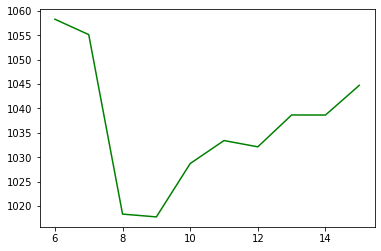

n_components with minimum perplexity: 9


In [10]:
def test_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior=0.1,
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []
    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter,
            topic_word_prior= topic_word_prior, doc_topic_prior=doc_topic_prior, 
            learning_method='batch', n_jobs= -1, random_state=7)
        lda.fit(cv)
        iter_num.append(i)
        per_value.append(lda.perplexity(cv))
    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity:", 
      test_perplexity(review_cv, start=6, end=15))

In [11]:
lda = LatentDirichletAllocation(n_components=8, #추출할 topic의 수를 지정 max_iter=20,
                                topic_word_prior=0.1,
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs=-1,
                                random_state=7)
review_topics = lda.fit_transform(review_cv)
print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: image, graphics, available, file, mail, data, ftp, information, files, software
Topic #1: com, posting, gov, nntp, host, nasa, university, distribution, ___, ibm
Topic #2: com, keith, morality, caltech, sgi, objective, article, nntp, host, think
Topic #3: com, article, jesus, know, god, just, don't, people, good, i'm
Topic #4: people, god, don't, does, think, say, believe, just, like, way
Topic #5: drive, scsi, com, card, ide, controller, disk, bus, use, hard
Topic #6: space, nasa, access, article, launch, year, just, moon, digex, henry
Topic #7: key, encryption, clipper, chip, com, government, keys, use, security, public



In [12]:
!pip install gensim

In [13]:
!pip install pyldavis

     ---------------------------------------- 1.7/1.7 MB 8.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=d8dfb05d2fc5e17bdfa429541f212b30999529ad5725cbda34dc15f15ff0fea4
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
Successfully built pyldavis


In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
cachedStopWords = stopwords.words("english")
RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) # 영어 불용어를 가져옴
def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2] 
    return words
texts = [tokenizer(news) for news in newsgroups_train.data]

In [15]:
from gensim.corpora.dictionary import Dictionary
# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))
# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n = 2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))
# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts] 
print('#Number of unique tokens: %d' % len(dictionary)) 
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 46466
#Number of unique words after removing rare and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 3219


In [ ]:
from gensim.models import LdaModel
num_topics = 8
passes = 5
model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

In [ ]:
model.print_topics(num_words=10)

In [ ]:
 print("#topic distribution of the first document: ", model.get_document_topics(corpus)
[0])

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
# LDA 모형을 pyLDAvis 객체에 전달
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz